In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Pandas Version: ", pd.__version__)

Pandas Version:  1.0.4


# Introduction

You can use plot() methof on a Pandas Series or Dataframe to plot a graph. Default is a line plot but you can specify other plot types too.
* line
* area
* bar
* barh
* pie
* box
* hexbin
* hist
* kde
* density
* scatter

## Line Plot
First, let’s just make a basic Series in pandas and make a line plot.

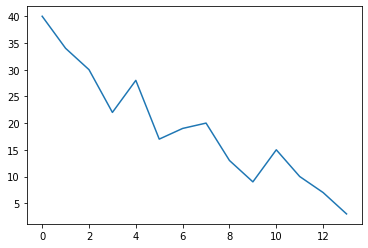

In [4]:
mydata = pd.Series([40, 34, 30, 22, 28, 17, 19, 20, 13, 9, 15, 10, 7, 3])
mydata.plot()

Now we can customise this plot.

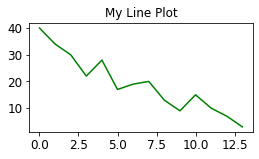

In [5]:
mydata.plot(figsize=(4, 2), color='green', title = 'My Line Plot', fontsize=12)

## Area Plot

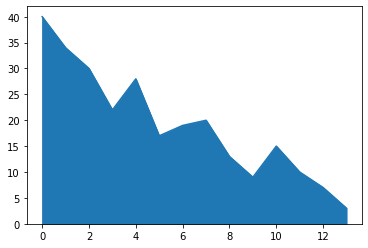

In [6]:
#Can use mydata.plot(kind='area') or mydata.plot.area()
mydata.plot.area()

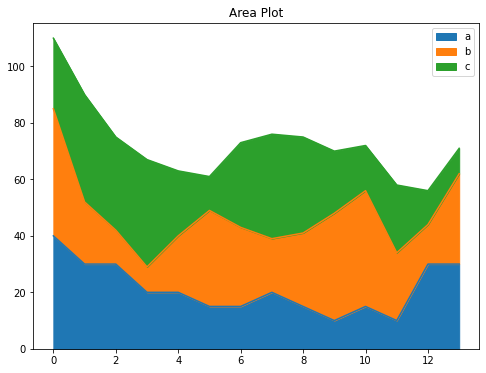

In [7]:
a = pd.Series([40, 30, 30, 20, 20, 15, 15, 20, 15, 10, 15, 10, 30, 30])
b = pd.Series([45, 22, 12, 9, 20, 34, 28, 19, 26, 38, 41, 24, 14, 32])
c = pd.Series([25, 38, 33, 38, 23, 12, 30, 37, 34, 22, 16, 24, 12, 9])
d = pd.DataFrame({'a':a, 'b': b, 'c': c})
d.plot.area(figsize=(8, 6), title='Area Plot')

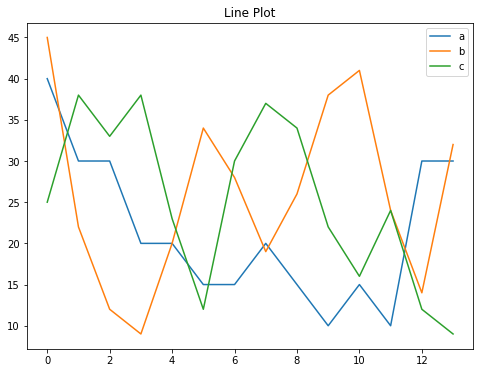

In [8]:
d.plot(figsize=(8, 6), title='Line Plot')

## Histogram
A histogram provides the distribution of frequency.

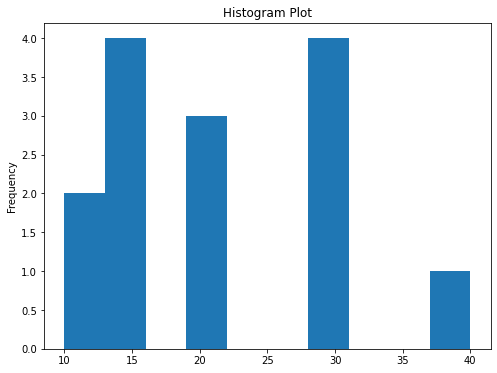

In [9]:
a.plot.hist(figsize=(8, 6), title='Histogram Plot')

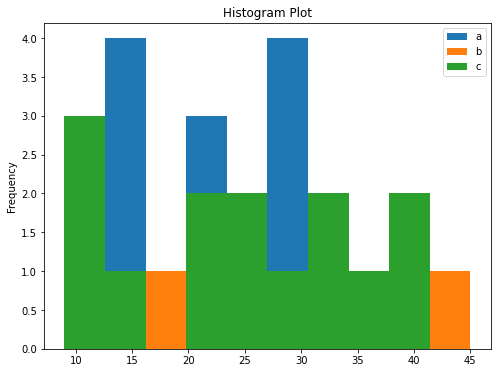

In [10]:
d.plot.hist(figsize=(8, 6), title='Histogram Plot')

# Time Series Visualizer

In [11]:
df=pd.read_csv("/home/chaudha4/Projects/pyprojects/python-projects/data_analysis/ch04-time-series-visualizer/fcc-forum-pageviews.csv",
              parse_dates=True,
              index_col=0)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [12]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [14]:
# Clean the data by filtering out days when the page views were 
# in the top 2.5% of the dataset or bottom 2.5% of the dataset

print(df.value.quantile(0.025))
print(df.value.quantile(0.975))
df1 = df [(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]
df1.head()

17876.4
177613.075


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [15]:
# rename the index
df1 = df1.rename_axis("Date")


# rename the column
df1 = df1.rename(columns={"value": "Page Views"})

df1.tail()

,Page Views
Date,
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-03,158549


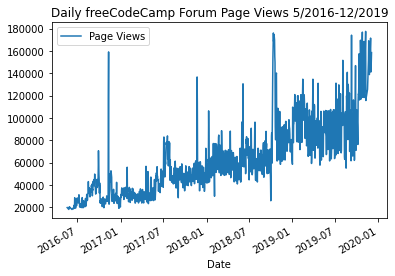

In [16]:
# A simple line plot.
df1.plot(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

## Plot using Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

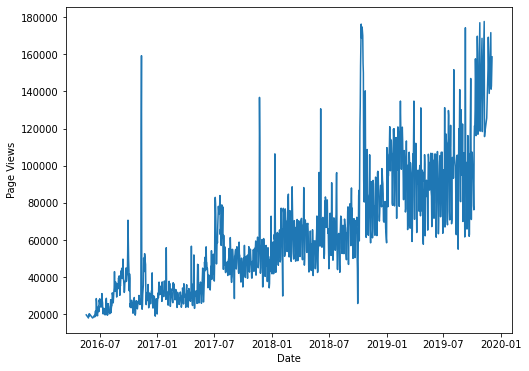

In [17]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Now draw it.
ax = sns.lineplot(x=df1.index, y="Page Views", data=df1)


## Sub Plots

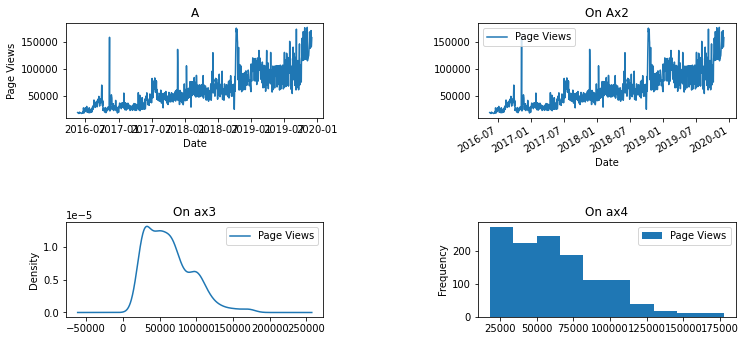

In [24]:
# using tuple unpacking for multiple Axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))


plt.subplots_adjust(wspace=.6, hspace=1.1)

# On ax1
sns.lineplot(x=df1.index, y=df1.columns[0], data=df1, ax=ax1)
ax1.set_title('A')

# on Ax2
df1.plot(title='On Ax2', ax=ax2)

# on Ax3
df1.plot(kind="kde",title='On ax3', ax=ax3)

# on Ax3
df1.plot(kind="hist",title='On ax4', ax=ax4)